In [35]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

# Conectando con Big Query

In [3]:
client = bigquery.Client()

## Obteniendo el dataset 'TheLook Ecommerce'

In [4]:
# Referencia a "thelook_ecommerce" dataset
dataset_ref = client.dataset("thelook_ecommerce",
                             project="bigquery-public-data")

# Solicitamos el dataset mediante el API
dataset = client.get_dataset(dataset_ref)

## Listando tablas del dataset

In [5]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

distribution_centers
events
inventory_items
order_items
orders
products
users


## Ajustando configuración

In [6]:
LIMIT = 1000*1000*1000 #1GB
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=LIMIT)

# Revisando Tablas del dataset

In [7]:
def get_table(table: str):
    table_ref = dataset_ref.table(table)
    tbl = client.get_table(table_ref)

    return tbl

## Centros de Distribución

In [8]:
table = get_table('distribution_centers')
client.list_rows(table, max_results=5).to_dataframe()

,id,name,latitude,longitude,distribution_center_geom
0,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,POINT(-73.7834 40.634)
1,10,Savannah GA,32.0167,-81.1167,POINT(-81.1167 32.0167)
2,5,New Orleans LA,29.9500,-90.0667,POINT(-90.0667 29.95)
3,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)
4,3,Houston TX,29.7604,-95.3698,POINT(-95.3698 29.7604)


Tabla que contiene información sobre la ubicación de los centros de distribución:
- name: Nombre de las ciudades de US donde se encuentran los centros de distribución
- latitude: Parte de la coordenada para ubicar el centro de distribución en la tierra
- longitud: Parde de la coordenada para ubicar el centro de distribución en la tierra
- distribution_center_geom: Coordenada completa de la posición del centro de distribución

## Eventos

In [9]:
table = get_table('events')
client.list_rows(table, max_results=5).to_dataframe()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1967385,<NA>,3,fd285735-f822-48b9-b08e-1f6bf9288c1d,2021-02-08 01:28:00+00:00,139.156.64.182,Sapporo,Hokkaido,003-0021,Safari,Organic,/cancel,cancel
1,2208039,<NA>,3,600d7ed7-a3b3-4544-bfbc-62a27cf75cbb,2024-05-28 12:48:00+00:00,78.247.98.58,São Paulo,São Paulo,02220-000,Safari,Facebook,/cancel,cancel
2,1669255,<NA>,3,b0005e7d-7282-4116-b43b-8a0d8d545edb,2024-07-23 07:09:00+00:00,24.50.213.0,São Paulo,São Paulo,02675-031,Chrome,Email,/cancel,cancel
3,2304150,<NA>,3,6468a8df-f4cd-427c-902a-a176120c48d4,2023-05-31 08:22:00+00:00,158.64.97.241,São Paulo,São Paulo,02675-031,Chrome,Email,/cancel,cancel
4,2035503,<NA>,3,6be47e87-f72a-4f20-b8db-0afb4b9e2724,2024-09-16 04:57:00+00:00,30.28.184.19,São Paulo,São Paulo,02675-031,Firefox,Email,/cancel,cancel


La tabla contiene la secuencia de eventos según identificadores como `user_id` y `session_id`.

## Inventario de Items

In [10]:
table = get_table('inventory_items')
client.list_rows(table, max_results=5).to_dataframe()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,53477,13844,2022-10-10 10:46:28+00:00,2022-10-12 12:39:28+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,53478,13844,2021-03-10 16:56:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,82713,13844,2024-02-25 00:07:56+00:00,2024-04-21 05:52:56+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,82714,13844,2022-10-16 15:11:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,331100,13844,2024-12-26 21:38:18+00:00,2025-01-05 10:12:18+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


La table contiene información relevante acerca de los items que el ecommerce comercializa.

## Orden de Items

In [11]:
table = get_table('order_items')
client.list_rows(table, max_results=5).to_dataframe()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,4129,2877,2263,14235,11139,Cancelled,2025-01-02 08:34:43+00:00,NaT,NaT,NaT,0.02
1,20862,14456,11614,14235,56331,Complete,2024-10-06 06:46:05+00:00,2024-10-08 21:25:00+00:00,2024-10-10 05:34:00+00:00,NaT,0.02
2,166234,114877,92123,14235,449042,Processing,2024-09-16 03:53:33+00:00,NaT,NaT,NaT,0.02
3,15035,10444,8312,14235,40550,Shipped,2020-06-02 23:05:30+00:00,2020-06-03 19:06:00+00:00,NaT,NaT,0.02
4,46148,32083,25859,14159,124830,Processing,2024-09-30 14:34:32+00:00,NaT,NaT,NaT,0.49


La tabla contiene información de los productos comprados por los usuarios, con los respectivos estados, precios, envíos, etc.

## Ordenes

In [12]:
table = get_table('orders')
client.list_rows(table, max_results=5).to_dataframe()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2024-09-27 03:41:00+00:00,NaT,NaT,NaT,1
1,9,6,Cancelled,F,2020-09-21 05:59:00+00:00,NaT,NaT,NaT,1
2,28,23,Cancelled,F,2021-05-02 01:11:00+00:00,NaT,NaT,NaT,1
3,35,29,Cancelled,F,2024-09-23 15:59:00+00:00,NaT,NaT,NaT,1
4,46,36,Cancelled,F,2024-08-27 18:30:00+00:00,NaT,NaT,NaT,1


La tabla contiene información de la orden efectuada por el usuario y su respectivo estado.

## Productos

In [13]:
table = get_table('products')
client.list_rows(table, max_results=5).to_dataframe()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


Columna con la información de cada producto que se vende en los distintos centros de distribución

## Usuarios

In [14]:
table = get_table('users')
client.list_rows(table, max_results=5).to_dataframe()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,5687,Alisha,Kelly,alishakelly@example.net,12,F,Acre,4989 Heather Drive Suite 895,69980-000,null,Brasil,-8.065346,-72.870949,Search,2019-11-13 16:07:00+00:00,POINT(-72.87094866 -8.065346116)
1,21589,Ellen,Diaz,ellendiaz@example.com,37,F,Acre,16868 Kathryn Path Apt. 269,69980-000,null,Brasil,-8.065346,-72.870949,Search,2023-04-13 06:41:00+00:00,POINT(-72.87094866 -8.065346116)
2,71567,Michelle,Smith,michellesmith@example.org,46,F,Acre,9530 Jonathan Mission,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-08-22 12:06:00+00:00,POINT(-72.87094866 -8.065346116)
3,94294,Theresa,Williamson,theresawilliamson@example.org,39,F,Acre,5932 Robert Bridge Suite 700,69980-000,null,Brasil,-8.065346,-72.870949,Search,2023-06-16 17:52:00+00:00,POINT(-72.87094866 -8.065346116)
4,89188,Eric,Mclean,ericmclean@example.com,60,M,Acre,45179 Myers Land Suite 315,69980-000,null,Brasil,-8.065346,-72.870949,Organic,2023-11-27 11:29:00+00:00,POINT(-72.87094866 -8.065346116)


Tabla con la información de cada usuario del ecommerce. Se almacenan datos importantes como el género, edad, ubicación, etc.

In [15]:
# Tablas
orders_table = 'bigquery-public-data.thelook_ecommerce.orders'
order_items_table = 'bigquery-public-data.thelook_ecommerce.order_items'
users_table = 'bigquery-public-data.thelook_ecommerce.users'
products_table = 'bigquery-public-data.thelook_ecommerce.products'
inventory_items_table ='bigquery-public-data.thelook_ecommerce.inventory_items' 
events_table = 'bigquery-public-data.thelook_ecommerce.events'
distribution_centers = 'bigquery-public-data.thelook_ecommerce.distribution_centers'

In [19]:
def get_query(q: str) -> pd.DataFrame:
    return client.query(q, job_config=safe_config).to_dataframe()

# Conociendo el negocio

## Qué clase de productos vende el negocio?

In [20]:
query = f"""
SELECT DISTINCT category
FROM `{products_table}`
"""
get_query(query)

,category
0,Accessories
1,Plus
2,Swim
3,Active
4,Socks & Hosiery
5,Socks
6,Dresses
7,Pants & Capris
8,Fashion Hoodies & Sweatshirts
9,Skirts


El ecommerce vende ropa y accesorios

## Qué departamento de productos tiene el negocio?

In [21]:
query = f"""
SELECT DISTINCT department
FROM `{products_table}`
"""
get_query(query)

,department
0,Women
1,Men


- El negocio vende producto para hombres y mujeres
- Puede que no venda producto para niños y bebes, se confirmará con la edad

## Cuál es el rango de precio por sus productos?

In [22]:
query = f"""
SELECT 
MIN(retail_price) AS min_price,
MAX(retail_price) AS max_price,
AVG(retail_price) AS avg_price
FROM `{products_table}`
"""
get_query(query)

,min_price,max_price,avg_price
0,0.02,999.0,59.220164


- Cuenta con productos de todas las gamas de precio
- Por lo tanto, contará también con distintos grupos de usuarios según el monto de consumo.

## Dónde se encuentran sus usuarios?

In [23]:
query = f"""
SELECT DISTINCT country
FROM `{users_table}`
"""
get_query(query)

,country
0,Brasil
1,Japan
2,United States
3,Colombia
4,Spain
5,China
6,Australia
7,France
8,Germany
9,Belgium


- Cuenta con una amplia cobertura de países donde llegan sus productos.
- No solo en América, sino también Europa, Asia, Oceanía.

## Qué edad tienen sus usuarios?

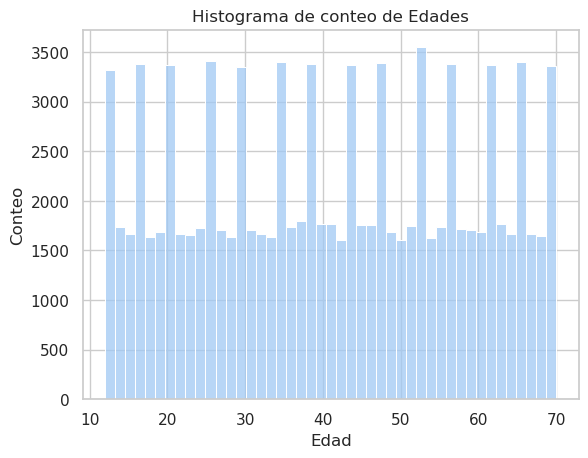

In [42]:
query = f"""
SELECT age
FROM `{users_table}`
"""
sns.histplot(data=get_query(query), x='age', stat='count');
plt.xlabel('Edad');
plt.ylabel('Conteo');
plt.title('Histograma de conteo de Edades');

- Los usuarios van desde los 12 hasta los 70 años
- El negocio comprende un público adolescente, juvenil, adulto y adulto mayor

## Cómo conocen los usuarios el negocio?

In [52]:
query = f"""
SELECT DISTINCT traffic_source, COUNT(*) AS count
FROM `{users_table}`
GROUP BY traffic_source
ORDER BY count DESC
"""
get_query(query)

,traffic_source,count
0,Search,69952
1,Organic,14951
2,Facebook,6160
3,Email,4996
4,Display,3941


Los usuarios conocen el negocio de 5 maneras distintas, siendo la `búsqueda` la fuente de tráfico con más usuarios reportados.

## Cuántos usuarios hombres y mujeres maneja el negocio?

In [53]:
query = f"""
SELECT DISTINCT gender, COUNT(*) AS count
FROM `{users_table}`
GROUP BY gender
ORDER BY count DESC
"""
get_query(query)

,gender,count
0,F,50046
1,M,49954


Las mujeres son el género que más interacción tiene con la tiendo, pero no muy lejos de los hombres.

# Analizando el negocio

## Cuántas ventas por año ha obtenido el negocio?

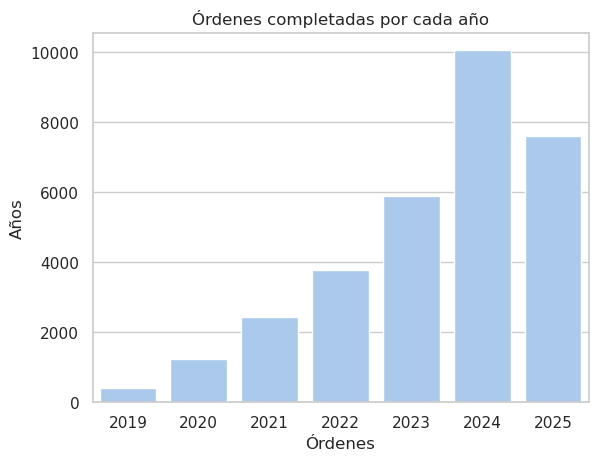

In [67]:
query = f"""
SELECT 
    EXTRACT(YEAR FROM created_at) AS year,
    COUNT(order_id) AS orders,
FROM `{orders_table}`
WHERE status = 'Complete'
GROUP BY year
ORDER BY year DESC
"""
sns.barplot(get_query(query), x='year', y='orders');
plt.title('Órdenes completadas por cada año');
plt.xlabel('Órdenes');
plt.ylabel('Años');

- El negocio con el pasar de años ha ido creciendo.
- Las ventas reflejan un crecimiento de casi el doble en el 2024
- El 2025 parece ser un año igual de prometedor que el 2024 debido a que aún no se ha terminado

## Cuáles son los ingresos y costos por año del negocio?

In [100]:
q = f"""
SELECT 
    EXTRACT(YEAR FROM oi.created_at) AS year,
    ROUND(SUM(p.cost), 2) AS cost,
    ROUND(SUM(oi.sale_price), 2) AS revenue
FROM `{order_items_table}` AS oi
INNER JOIN `{products_table}` AS p
ON oi.product_id = p.id
WHERE oi.status = 'Complete'
GROUP BY year
ORDER BY year
"""
df_q = get_query(q)
df_q_melt = pd.melt(df_q, id_vars='year',
                    value_vars=['revenue', 'cost'],
                    var_name='type',
                    value_name='value')
df_q_melt.head()

,year,type,value
0,2019,revenue,32394.49
1,2020,revenue,107683.70
2,2021,revenue,211576.92
3,2022,revenue,331088.24
4,2023,revenue,499825.36


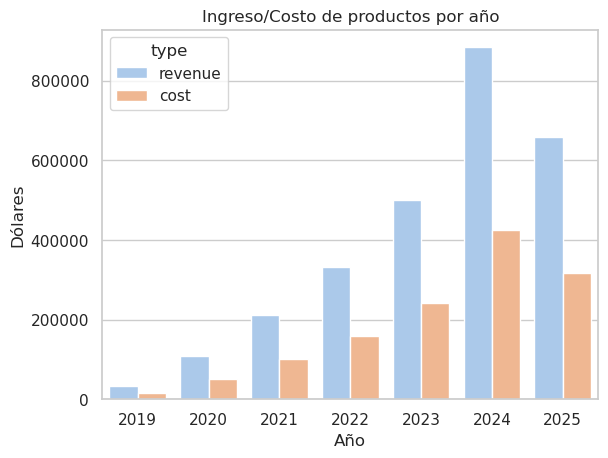

In [92]:
ax = sns.barplot(data=df_q_melt, x='year', y='value', hue='type')
plt.xlabel('Año')
plt.ylabel('Dólares')
plt.title('Ingreso/Costo de productos por año');

- Los ingresos han ido aumentando considerablemente cada año
- Los costos se mantienen alrededor de la mitad de los ingresos por cada año
- El año 2024 ha sido el año con mayores ingresos
- Siguen el patrón del gráfico de ordenes completadas por año

## Cuál es la categoría de productos que más se ha vendido?

In [99]:
q = f"""
SELECT
    p.category,
    ROUND(SUM(oi.sale_price), 2) AS sales
FROM `{order_items_table}` AS oi
INNER JOIN `{products_table}` AS p
ON p.id = oi.product_id
WHERE status = 'Complete'
GROUP BY p.category
ORDER BY sales DESC
"""
get_query(q).head()

,category,sales
0,Outerwear & Coats,335324.77
1,Jeans,315854.17
2,Sweaters,210011.05
3,Fashion Hoodies & Sweatshirts,161905.82
4,Swim,160268.94


- La ropa de exterior y abrigos, junto con los Jeans, son las productos más vendidos
- En sí, la tienda vende mucho más ropa para el frío que ropa de verano

## Cuál categoría fue la más vendida por año?

In [121]:
q = f"""
WITH category_sales_by_year AS (
    SELECT 
        EXTRACT(YEAR FROM oi.created_at) AS year,
        p.category,
        ROUND(SUM(oi.sale_price), 2) AS sales
    FROM `{order_items_table}` AS oi
    INNER JOIN `{products_table}` AS p
    ON p.id = oi.product_id
    WHERE oi.status = 'Complete'
    GROUP BY year, p.category
),
ranked_categories AS (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY year ORDER BY sales DESC) AS rn
    FROM category_sales_by_year
)
SELECT year, category, sales
FROM ranked_categories
WHERE rn = 1
ORDER BY year;
"""
df_q = get_query(q)

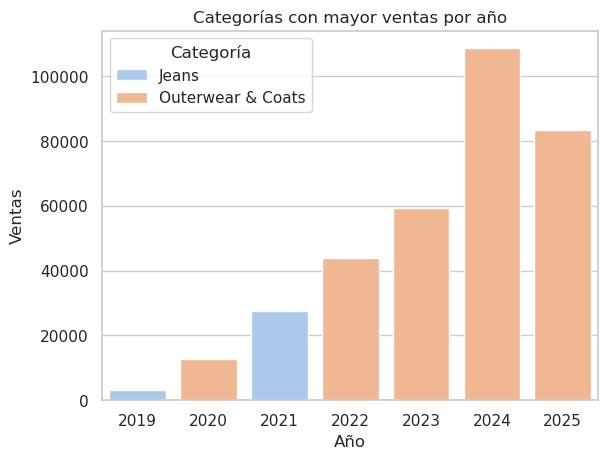

In [126]:
sns.barplot(data=df_q, x='year', y='sales', hue='category')
plt.legend(title='Categoría')
plt.title('Categorías con mayor ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas');

- En su comienzo, el negocio vendió más `jeans` que cualquier otra categoría
- El año 2024 tiene el mayor registro de ventas y la categoría más vendida es `Outerwear & Coats` 
- Esta última categoría es la que domina en ventas

In [127]:
# Todo: Continuar con más preguntas y hacer un modelo de recomendación de productos